In [219]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from IPython.display import display, HTML
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

os.chdir('F:\Carpeta Drive\Python\Base')
#https://www.kaggle.com/gangliu/german-credit
df=pd.read_csv('german.csv', encoding = "ISO-8859-1")
colnames=['chkngAcctStatus', 'durationMonths', 'creditHistory', 'loanPurpose', 'creditAmount', 'savingsTotal', 'crrntEmplmtSince', 'instllmtPct', 'persnlStatus', 'othrDebtorGuaranters', 'crrntResidenceSince', 'propertyType', 'age', 'otherInstllmtType', 'housingType', 'existingCredits','jobStatus', 'numDependents', 'registeredPhone', 'foriegnWorker', 'goodBad']

In [220]:
df.columns=colnames

In [221]:
df.shape

(1000, 21)

In [222]:
df.head(8)

,chkngAcctStatus,durationMonths,creditHistory,loanPurpose,creditAmount,savingsTotal,crrntEmplmtSince,instllmtPct,persnlStatus,othrDebtorGuaranters,...,propertyType,age,otherInstllmtType,housingType,existingCredits,jobStatus,numDependents,registeredPhone,foriegnWorker,goodBad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
chkngAcctStatus         1000 non-null object
durationMonths          1000 non-null int64
creditHistory           1000 non-null object
loanPurpose             1000 non-null object
creditAmount            1000 non-null int64
savingsTotal            1000 non-null object
crrntEmplmtSince        1000 non-null object
instllmtPct             1000 non-null int64
persnlStatus            1000 non-null object
othrDebtorGuaranters    1000 non-null object
crrntResidenceSince     1000 non-null int64
propertyType            1000 non-null object
age                     1000 non-null int64
otherInstllmtType       1000 non-null object
housingType             1000 non-null object
existingCredits         1000 non-null int64
jobStatus               1000 non-null object
numDependents           1000 non-null int64
registeredPhone         1000 non-null object
foriegnWorker           1000 non-null object
g

In [224]:
df.isnull().any()

chkngAcctStatus         False
durationMonths          False
creditHistory           False
loanPurpose             False
creditAmount            False
savingsTotal            False
crrntEmplmtSince        False
instllmtPct             False
persnlStatus            False
othrDebtorGuaranters    False
crrntResidenceSince     False
propertyType            False
age                     False
otherInstllmtType       False
housingType             False
existingCredits         False
jobStatus               False
numDependents           False
registeredPhone         False
foriegnWorker           False
goodBad                 False
dtype: bool

In [225]:
df.groupby('goodBad')['goodBad'].count()

goodBad
0    700
1    300
Name: goodBad, dtype: int64

In [226]:
pd.set_option('precision', 2)
data=df.select_dtypes(include =['int64'])
data=data.drop(['goodBad'], axis=1)
labels=data.columns.values

[]

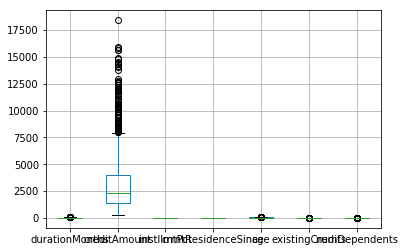

In [227]:
data.boxplot(return_type='dict')
plt.plot()

In [228]:
quantile=df.drop(['goodBad'], axis=1).describe().iloc[[4,6],:]

In [229]:
q1=quantile.iloc[0,:]
q3=quantile.iloc[1,:]
IQR=q3-q1

In [230]:
LI=q1-1.5*IQR
LS=q3+1.5*IQR

In [231]:
ls=np.asscalar(LS.filter(regex='durationMonths',axis=0).values)
li=np.asscalar(LI.filter(regex='durationMonths',axis=0).values)

In [232]:
rows_ini=df.shape[0]

In [233]:
df=df[(df['durationMonths'] <ls) & (df['durationMonths'] >li)]
rows_1=df.shape[0]

In [234]:
print("Porcentaje de datos:{:.2f}%".format((rows_1/rows_ini)*100))

Porcentaje de datos:91.90%


In [235]:
df.shape

(919, 21)

In [236]:
corr=df.drop(['goodBad'], axis=1).corr(method='pearson', min_periods=1)
corr.style.background_gradient()

,durationMonths,creditAmount,instllmtPct,crrntResidenceSince,age,existingCredits,numDependents
durationMonths,1,0.51,0.14,0.038,-0.076,0.037,-0.057
creditAmount,0.51,1,-0.28,0.043,0.025,0.055,0.037
instllmtPct,0.14,-0.28,1,0.022,0.042,0.018,-0.1
crrntResidenceSince,0.038,0.043,0.022,1,0.27,0.095,0.033
age,-0.076,0.025,0.042,0.27,1,0.15,0.13
existingCredits,0.037,0.055,0.018,0.095,0.15,1,0.098
numDependents,-0.057,0.037,-0.1,0.033,0.13,0.098,1


In [237]:
df=df.drop(['creditAmount'], axis=1)
print(df.shape)

(919, 20)


In [238]:
hr_vars=df.columns.values.tolist()
y=df.select_dtypes(exclude =['int64']).columns
X=[i for i in hr_vars if i in y]

In [239]:
#Function for one-hot encoding (dummy variable) of categorical variables

cat_vars=X

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [240]:
df.shape  

(919, 74)

In [241]:
df=df.drop(X, axis=1)
df.head(3)

,durationMonths,instllmtPct,crrntResidenceSince,age,existingCredits,numDependents,goodBad,chkngAcctStatus_A11,chkngAcctStatus_A12,chkngAcctStatus_A13,...,housingType_A152,housingType_A153,jobStatus_A171,jobStatus_A172,jobStatus_A173,jobStatus_A174,registeredPhone_A191,registeredPhone_A192,foriegnWorker_A201,foriegnWorker_A202
0,6,4,4,67,2,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
2,12,2,3,49,1,2,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,3,4,53,2,2,1,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [242]:
df.shape 

(919, 61)

In [243]:
x = df.drop(['goodBad'], axis=1)
y = df['goodBad']
print(x.shape,y.shape)

(919, 60) (919,)


In [244]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x,y)
rfe = RFE(model, 15)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)



[False False False False False False False False  True  True  True  True
 False False  True  True  True False False False False  True  True  True
 False False False False  True False False False False  True False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False  True]
[41 21 35 44 33 25  9 13  1  1  1  1 14 20  1  1  1 15 39 16 26  1  1  1 29
  2 46 42  1 27 23  8 40  1 19  4 37 12 28 32  1  1  3 31 34 11 43 38  5 45
  7 10 22 30 36 17 24 18  6  1]


In [245]:
aux=pd.concat([pd.DataFrame(x.columns.values), pd.DataFrame(rfe.ranking_)], axis=1)
aux.columns=['Variables','Rank']
var=aux[(aux.Rank == 1)]['Variables'].values.tolist()

In [246]:
x=x[var]

In [257]:
x_train, x_test, y_train, y_test  =train_test_split(x, y, test_size=.3, random_state=123)

In [258]:
#Regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [259]:
score=logreg.score(x_test,y_test)
print("Score: ",score)

Score:  0.760869565217


In [260]:
from sklearn.metrics import confusion_matrix
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, logreg.predict(x_test)), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

,Predicted False,Predicted True
Actual False,190,18
Actual True,48,20


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       208
          1       0.53      0.29      0.38        68

avg / total       0.73      0.76      0.74       276



In [250]:
#Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [251]:
score=tree.score(x_test,y_test)
print("Score: ",score)

Score:  0.735507246377


In [252]:
from sklearn.metrics import confusion_matrix
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, tree.predict(x_test)), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

,Predicted False,Predicted True
Actual False,179,29
Actual True,44,24


In [262]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree.predict(x_test)))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       208
          1       0.45      0.35      0.40        68

avg / total       0.72      0.74      0.72       276



In [263]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [264]:
score=rf.score(x_test,y_test)
print("Score: ",score)

Score:  0.739130434783


In [265]:
from sklearn.metrics import confusion_matrix
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, rf.predict(x_test)), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

,Predicted False,Predicted True
Actual False,182,26
Actual True,46,22


In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.80      0.88      0.83       208
          1       0.46      0.32      0.38        68

avg / total       0.71      0.74      0.72       276



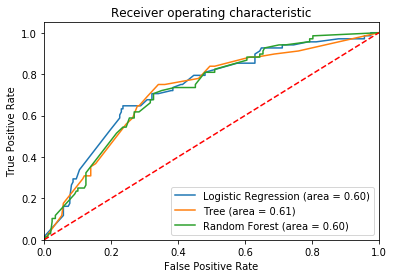

In [267]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize


logit_roc_auc = roc_auc_score(y_test,logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

tree_roc_auc = roc_auc_score(y_test, tree.predict(x_test))
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(tree_fpr, tree_tpr, label='Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

,importance,labels
1,0.23,chkngAcctStatus_A14
5,0.11,loanPurpose_A40
13,0.09,othrDebtorGuaranters_A103
4,0.08,creditHistory_A34
0,0.08,chkngAcctStatus_A13


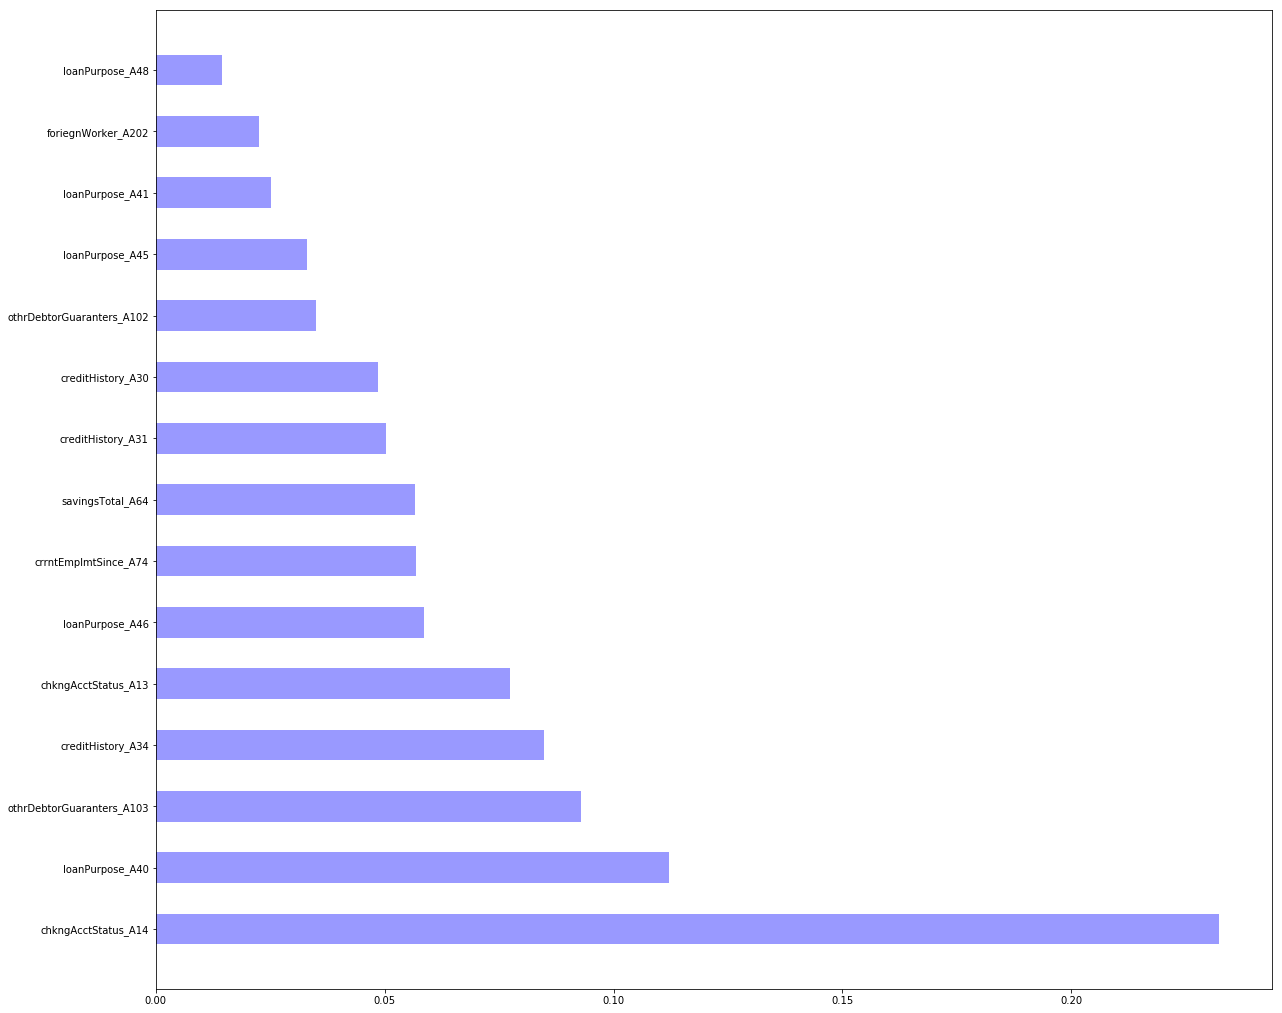

In [269]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(tree.feature_importances_, columns=["importance"])
df_f["labels"] = var
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(rf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [270]:
df_f["importance"]=df_f["importance"]*100
df_f["importance"]=df_f["importance"].map('{:,.2f}%'.format)
pd.concat([df_f["labels"], df_f["importance"]], axis=1)



,labels,importance
1,chkngAcctStatus_A14,23.22%
5,loanPurpose_A40,11.21%
13,othrDebtorGuaranters_A103,9.29%
4,creditHistory_A34,8.47%
0,chkngAcctStatus_A13,7.73%
8,loanPurpose_A46,5.85%
11,crrntEmplmtSince_A74,5.69%
10,savingsTotal_A64,5.65%
3,creditHistory_A31,5.03%
2,creditHistory_A30,4.84%


In [273]:
from sklearn.externals import joblib
joblib.dump(tree,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [274]:
tree=joblib.load('modelo_entrenado.pkl')